# 作业1

### <font color=red> **作业：**</font><font color=blue>**由3组对应点计算仿射变换矩阵**</font>

<br><center>![red_blue_triangle](./pics/red_blue_triangle.png)</center>
<br>Find the transformation matrix from the red triangle to the blue triangle, apply the transform, and display the red and blue triangle on the monitor screen.
<br>找到从红色三角形到蓝色三角形的变换矩阵，应用变换，并在监视器屏幕上显示红色和蓝色三角形。

## <font color=blue>**4 Affine transformation of an image    图像的仿射变换**</font>

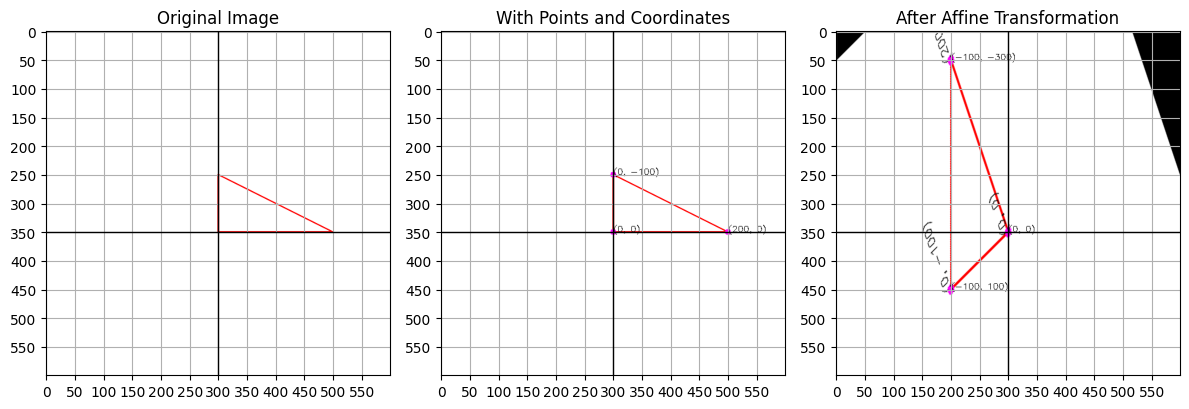

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def show_with_matplotlib(ax, img, title, offset_x, offset_y):
    """使用 matplotlib 显示图像的辅助函数"""
    # 将 BGR 图像转换为 RGB 图像，适应 matplotlib 的显示需求
    img_RGB = img[:, :, ::-1]  
    ax.imshow(img_RGB)  # 显示图像
    ax.set_title(title)  # 设置标题
    ax.grid(True)  # 显示网格
    # 设置 x 轴和 y 轴的刻度
    ax.set_xticks(np.arange(0, 600, 50))  
    ax.set_yticks(np.arange(0, 600, 50))
    # 根据偏移量添加一条水平线表示 x 轴
    ax.axhline(offset_y, color='black', linewidth=1)  
    # 根据偏移量添加一条垂直线表示 y 轴
    ax.axvline(offset_x, color='black', linewidth=1)  

def draw_affine_transform_image(offset_x, offset_y, triangle1_vertices, triangle2_vertices):
    """
    绘制带有仿射变换的图像并标记顶点的坐标
    :param offset_x: 坐标轴的 x 偏移量
    :param offset_y: 坐标轴的 y 偏移量
    :param triangle1_vertices: 原始三角形的顶点坐标（相对于原点）
    :param triangle2_vertices: 仿射变换目标三角形的顶点坐标
    """
    # 图像的宽和高
    width, height = 600, 600
    # 创建一个全白的图像（600x600 像素，3 通道）
    image = np.ones((height, width, 3), dtype=np.uint8) * 255  

    # 为第一个三角形的顶点加上偏移量
    triangle1_pts = np.array([[x + offset_x, y + offset_y] for x, y in triangle1_vertices], np.int32)
    triangle1_pts = triangle1_pts.reshape((-1, 1, 2))  # 将顶点转换为绘制所需的格式

    # 用红色绘制第一个三角形
    cv2.polylines(image, [triangle1_pts], isClosed=True, color=(0, 0, 255), thickness=2)

    # 复制图像用于标注顶点
    image_points = image.copy()
    # 在图像上标注第一个三角形的顶点，用紫色圆圈标记
    for x, y in triangle1_vertices:
        coord = (int(x + offset_x), int(y + offset_y))
        cv2.circle(image_points, coord, 5, (255, 0, 255), -1)
        # 在图像上标注顶点的坐标
        cv2.putText(image_points, f"({x}, {y})", coord, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # 定义仿射变换的源点（三角形1的顶点）和目标点（三角形2的顶点）
    pts_1 = np.float32([[x + offset_x, y + offset_y] for x, y in triangle1_vertices])
    pts_2 = np.float32([[x + offset_x, y + offset_y] for x, y in triangle2_vertices])

    # 计算仿射变换矩阵，并将其应用到图像上
    M = cv2.getAffineTransform(pts_1, pts_2)
    dst_image = cv2.warpAffine(image_points, M, (width, height))

    # 标注仿射变换后顶点的新坐标
    for pt in pts_2:
        # 标注新顶点的坐标
        new_coord = (int(pt[0]), int(pt[1]))
        cv2.circle(dst_image, new_coord, 5, (255, 0, 255), -1)
        cv2.putText(dst_image, f"({int(pt[0] - offset_x)}, {int(pt[1] - offset_y)})", new_coord, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # 创建三个子图用于显示原始图像、带标注的图像和仿射变换后的图像
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    
    # 显示原始图像
    show_with_matplotlib(axes[0], image, 'Original Image', offset_x, offset_y)
    show_with_matplotlib(axes[1], image_points, 'With Points and Coordinates', offset_x, offset_y)
    show_with_matplotlib(axes[2], dst_image, 'After Affine Transformation', offset_x, offset_y)

    # 调整子图的布局
    plt.tight_layout()
    plt.show()

# 示例用法
offset_x = 300  # x 轴的偏移量
offset_y = 350  # y 轴的偏移量
# 定义原始三角形的顶点
triangle1_vertices = [(0, 0), (200, 0), (0, -100)]  
# 定义仿射变换后目标三角形的顶点
triangle2_vertices = [(0, 0), (-100, -300), (-100, 100)]  

# 调用封装好的函数，绘制带仿射变换的图像
draw_affine_transform_image(offset_x, offset_y, triangle1_vertices, triangle2_vertices)


# 作业2

### <font color=red> **作业：**</font><font color=blue>**由4组对应点计算透视变换矩阵**</font>

<br><center>![barcode](./images/barcode.png) ![barcode](./images/barcode-distorted.png)</center>
<br><center></center>

- 编程把右图的歪斜畸变校正过来
- 保存成如下文件：xxx 作业-透视变换.ipynb （xxx为姓名）
- 所有同学都需要提交上述文件，截止日期：本节课结束后2天内
- 下节课会抽查，被抽到的同学需要现场演示

## <font color=blue>**5 Perspective transformation of an image  图像的透视变换**</font>

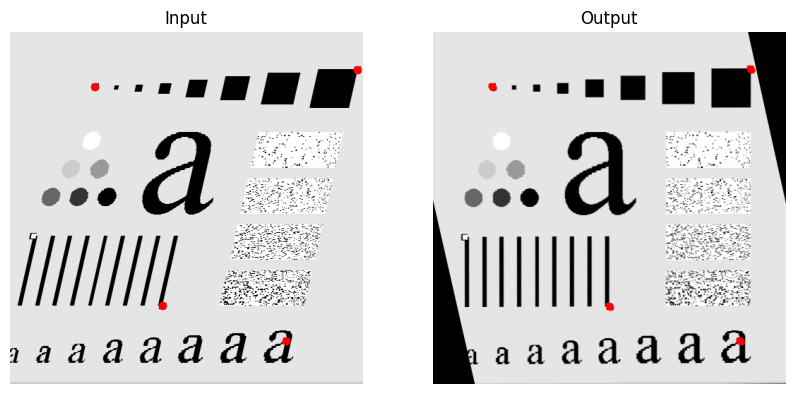

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def show_with_matplotlib(ax, img, title):
    """显示使用 matplotlib 的图像，指定轴"""
    img_RGB = img[:, :, ::-1]  # BGR 转换为 RGB
    ax.imshow(img_RGB)
    ax.set_title(title)
    ax.axis('off')  # 隐藏坐标轴

def perspective_transform(image_path, pts1, pts2, output_size=(500, 500)):
    """
    执行透视变换并显示输入图像和变换后的图像
    :param image_path: 输入图像的路径
    :param pts1: 源图像的四个点
    :param pts2: 目标图像的四个点
    :param output_size: 输出图像的尺寸 (默认 500x500)
    """
    # 读取输入图像
    image = cv2.imread(image_path)
    assert image is not None, "无法读取文件，请检查路径是否正确"
    
    # 在源图像上绘制选取的点
    for p in pts1:
        cv2.circle(image, (int(p[0]), int(p[1])), 6, (0, 0, 255), -1)

    # 计算透视变换矩阵并应用透视变换
    M = cv2.getPerspectiveTransform(pts1, pts2)
    dst = cv2.warpPerspective(image, M, output_size)

    # 创建子图用于横向排列图像
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # 显示输入图像和变换后的图像
    show_with_matplotlib(axes[0], image, 'Input')
    show_with_matplotlib(axes[1], dst, 'Output')

    # 显示结果
    plt.show()

# 示例使用：
image_path = './images/barcode-distorted.png'

# 定义源图像的四个点
pts1 = np.float32([[120, 79], [492, 55], [216, 389], [391, 439]])

# 定义目标图像的四个点
pts2 = np.float32([[84, 79], [450, 54], [250, 390], [435, 439]])

# 调用函数执行透视变换
perspective_transform(image_path, pts1, pts2)